In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
df = pd.read_csv('data/tweet_data.csv')

# EDA

In [4]:
df.sample(10)

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
751545,1151567263721512965,2019-07-17 19:00:05,-1,-1,147,False,True,False,104,NaN,43,-1,Now that the U.S. Justice Department has decli...,News,43741269,807095,The New York Times,NaN
131346,1088500531440640001,2019-01-24 18:15:24,-1,-1,26,False,True,False,19,NaN,7,-1,Sicily Has Villas for Sale for $1.50 Because T...,DIY & Craft,2937555,476199422,Tips & Tricks,NaN
576733,1136642901792808962,2019-06-06 14:36:00,1,5007,91,True,True,False,73,NaN,18,-1,Discover the exhibition “Alberto Giacometti in...,Art,1243238,16576356,Museo del Prado,https://video.twimg.com/ext_tw_video/111377306...
472618,1125097828286586880,2019-05-05 18:00:00,-1,-1,21,False,True,False,8,NaN,13,-1,WATCH: Elon Musk heads to Wall Street seeking ...,Business,2020676,15110357,Reuters Business,https://video.twimg.com/amplify_video/11240239...
455135,1123240850056675330,2019-04-30 15:01:02,-1,-1,120,False,True,False,58,https://pbs.twimg.com/media/D5aNma7XkAMv7iQ.jpg,62,-1,#AI and related #tech estimated to create 90 m...,Technology,122236,2344530218,Mike Quindazzi ✨,NaN
585232,1137236576872882176,2019-06-08 05:55:03,2,5006,80,False,True,True,58,NaN,22,911074943554658304,😎This Car Phone Mount Provides Maximum Stabili...,Travel,6624,1065124113612718081,Brilliant Age Products,https://video.twimg.com/ext_tw_video/113723645...
257898,1103225479899701249,2019-03-06 09:27:06,3,5001,16,False,True,False,9,NaN,7,-1,Neato Botvac D4 Connected review https://t.co/...,Technology,2153522,14763734,Digital Trends,NaN
226259,1099735040412524545,2019-02-24 18:17:20,2,5003,61,False,True,False,41,https://pbs.twimg.com/media/D0MLMNcXgAAR1Aj.jpg,20,-1,Love isn't finding a perfect person. It's seei...,Motivational,591572,200583835,Tim Fargo ❤,NaN
517756,1129846697918648322,2019-05-18 20:30:18,-1,-1,16,False,True,False,12,NaN,4,-1,Does nature conservation represent society? \n...,Nature,122853,171881218,BBC Wildlife,NaN
125199,1087825315093716992,2019-01-22 21:32:20,-1,-1,26,False,True,False,14,NaN,12,-1,When will the Fed's next rate increase come? T...,Business,5139408,34713362,Bloomberg,NaN


In [5]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [6]:
df.isnull().sum()

tweetID            0
crDate             0
edInput            0
editor             0
engages            0
isApproved         0
isEdNeed           0
isRT               0
likes              0
photoUrl      508020
retweets           0
rtUsID             0
text               0
topicName          0
usFlwrs            0
usID               0
usName             0
videoUrl      645425
dtype: int64

Can drop url columns

In [7]:
df.dtypes

tweetID        int64
crDate        object
edInput        int64
editor         int64
engages        int64
isApproved      bool
isEdNeed        bool
isRT            bool
likes          int64
photoUrl      object
retweets       int64
rtUsID         int64
text          object
topicName     object
usFlwrs        int64
usID           int64
usName        object
videoUrl      object
dtype: object

## edInput

Label notes: 
-1: no editor
1: human editor agrees
2: human editor disagrees
3: human editor unsure about it
4: correct classification but represents a duplicate entry

In [8]:
# how many tweets have been reviewed by an editor/how big is my labelled dataset size?
df['edInput'].value_counts()

edInput
-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: count, dtype: int64

## editor

In [9]:
# What is 'editor' column? 
df['editor'].value_counts()

editor
-1       422665
 5004     68536
 5003     68186
 5002     59317
 5001     52629
 5006     40658
 5007     27722
 5005     24934
 5008     21167
 5101        44
 1001        36
 2001        22
Name: count, dtype: int64

Looks like the 'editor' column is a categorical variable that indicates the editor of the tweet (ID)

## isApproved

In [10]:
df['isApproved'].value_counts()    

isApproved
False    558472
True     227444
Name: count, dtype: int64

isApproved is likely highly level QA flag — indicating that a tweet (and possibly its label) has been reviewed and approved for downstream use? Ignore for now? Could use later for high-confidence on correct labelling (where edInput == 1 & isApproved == True)

In [11]:
# Have a look at the overlap between isApproved and edInput columns
pd.crosstab(df['edInput'], df['isApproved'])

isApproved,False,True
edInput,,
-1,410817,11848
1,0,215577
2,106741,0
3,8196,4
4,32718,15


## isEdneed

In [12]:
df['isEdNeed'].value_counts()    

isEdNeed
True    785916
Name: count, dtype: int64

No information in this column, just drop for cleaned dataset

## isRT

Column indicates retweets

In [13]:
df['isRT'].value_counts()

isRT
False    651001
True     134915
Name: count, dtype: int64

How much of each topic is made of retweets vs original posts?

## usName

In [14]:
print(df['usName'].nunique())
print(df['usName'].value_counts().head(10))

22978
usName
Bloomberg                  62033
Business Insider           36255
Digital Trends             22131
The Wall Street Journal    20364
The New York Times         16862
HuffPost                   15798
Tim Fargo 🔥                15289
Reuters Top News           14897
NowThis                    14727
Inc.                       14412
Name: count, dtype: int64


Many publications (>20,000)! So if 60k tweets are from Bloomberg and they’re all tagged “Business,” then the model could just memorize the source instead of learning from the text. Could be a feature, but then my model isn't learnign from the text, just memorising the source? Look at distribution of source by topic.

In [15]:
df['usID'].nunique() # similar to usName, nunique is not identical across the two though

22516

## Tweet engagement (engages, likes, retweets columns)

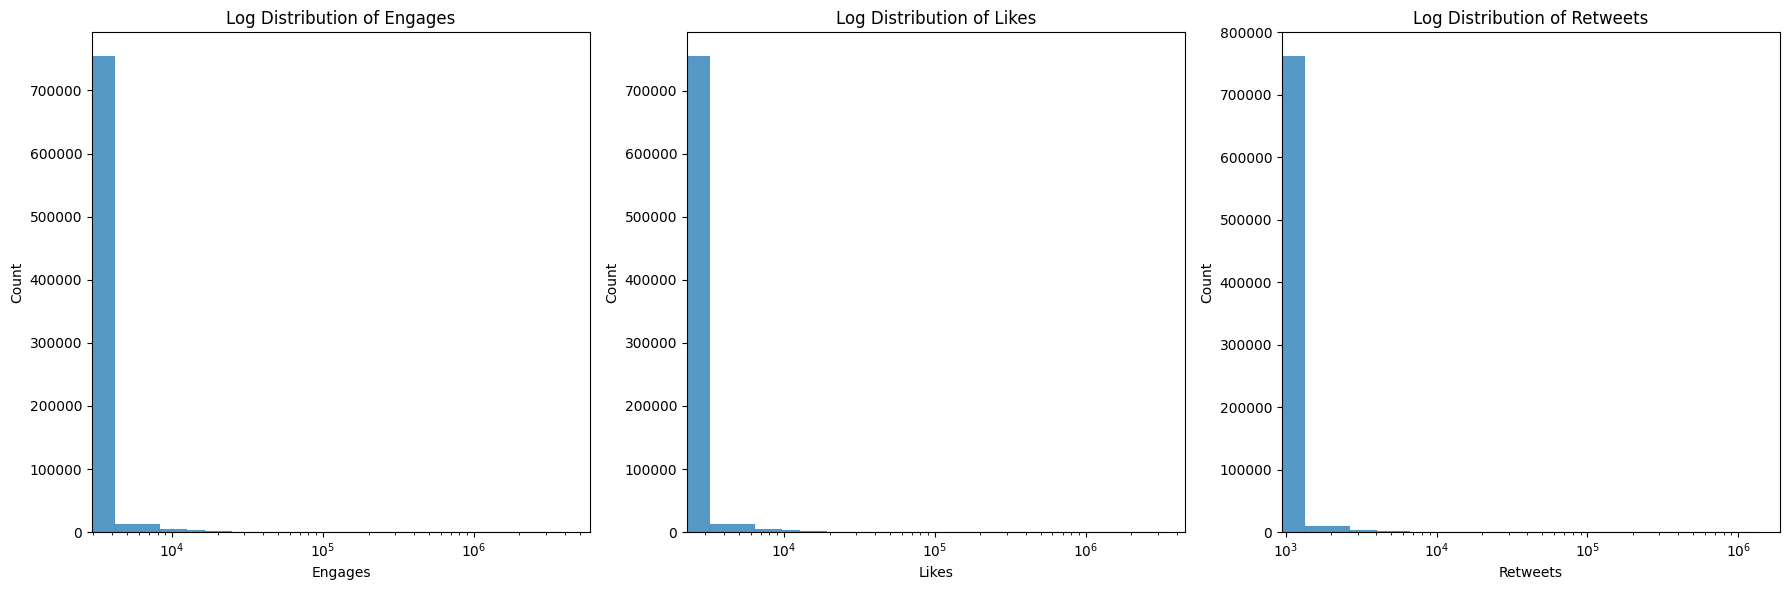

In [16]:
# Distributions of tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.histplot(x='engages', data=df, ax=axes[0], bins=1000)
axes[0].set_xscale('log')
axes[0].set_title('Log Distribution of Engages')
axes[0].set_xlabel('Engages')

sns.histplot(x='likes', data=df, ax=axes[1], bins=1000)
axes[1].set_xscale('log')
axes[1].set_title('Log Distribution of Likes')
axes[1].set_xlabel('Likes')

sns.histplot(x='retweets', data=df, ax=axes[2], bins=1000)
axes[2].set_xscale('log')
axes[2].set_title('Log Distribution of Retweets')
axes[2].set_xlabel('Retweets')

plt.tight_layout()
plt.show()

Distribution shows very strong right (positive skew), may be worth using log transformed values in modelling

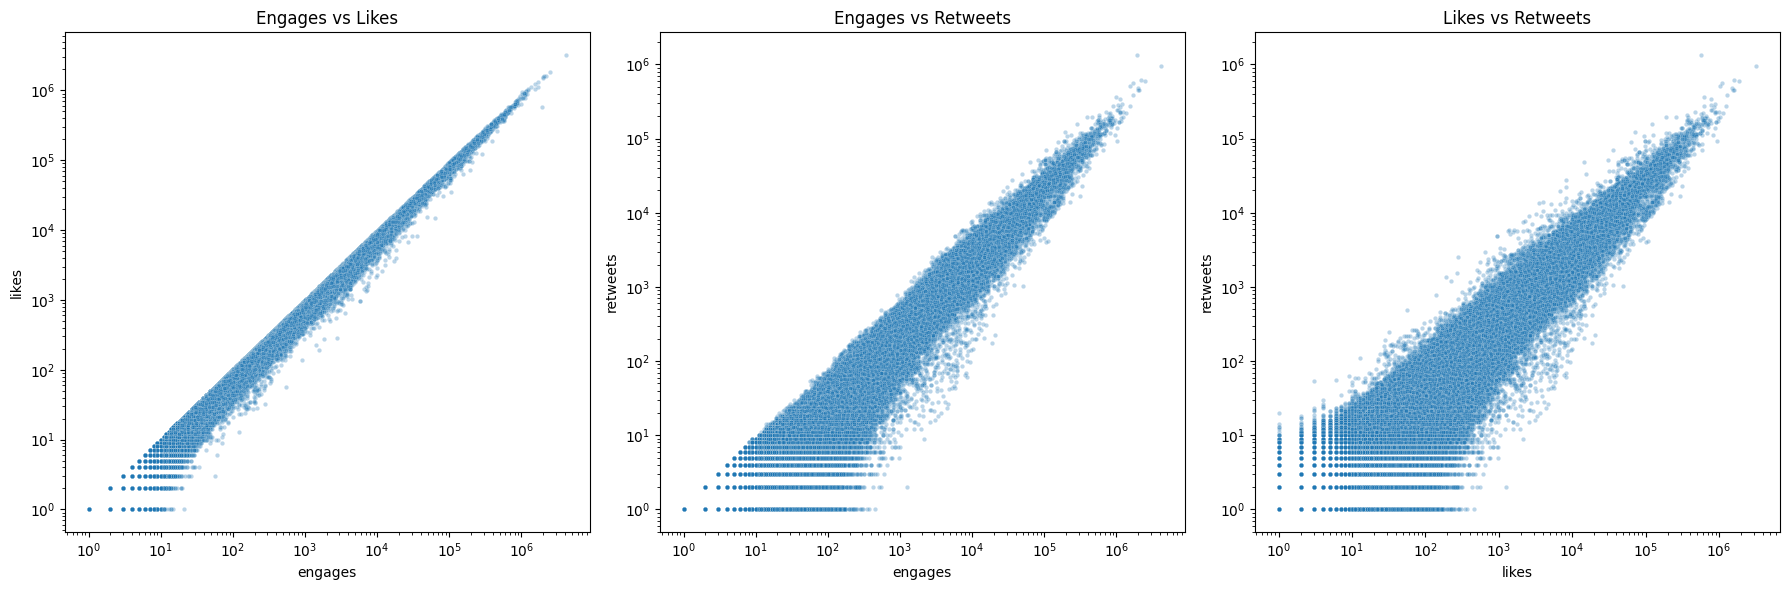

In [17]:
#Look at correlations across tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize = (18,6))
sns.scatterplot(x = 'engages', y = 'likes', data = df, ax=axes[0],alpha = 0.3, s = 10)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Engages vs Likes')

sns.scatterplot(x='engages', y = 'retweets', data = df, ax = axes[1],alpha = 0.3, s = 10)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title('Engages vs Retweets')

sns.scatterplot(x= 'likes', y = 'retweets', data = df, ax = axes[2], alpha = 0.3, s = 10)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Likes vs Retweets')

plt.tight_layout()
plt.show()



In [18]:
def log_corr_stats(x, y, df):
    # Filter to positive values to avoid log(0) or negatives
    mask = (df[x] > 0) & (df[y] > 0)
    log_x = np.log10(df.loc[mask, x])
    log_y = np.log10(df.loc[mask, y])
    
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    r_squared = r_value ** 2
    return r_squared, p_value

# calculate stats for each pair
r2_1, pval_1 = log_corr_stats('engages', 'likes', df)
r2_2, pval_2 = log_corr_stats('engages', 'retweets', df)
r2_3, pval_3 = log_corr_stats('likes', 'retweets', df)

print(f"Engages vs Likes: R² = {r2_1:.3f}, p = {pval_1:.10e}")
print(f"Engages vs Retweets: R² = {r2_2:.3f}, p = {pval_2:.10e}")
print(f"Likes vs Retweets: R² = {r2_3:.3f}, p = {pval_3:.10e}")

Engages vs Likes: R² = 0.990, p = 0.0000000000e+00
Engages vs Retweets: R² = 0.930, p = 0.0000000000e+00
Likes vs Retweets: R² = 0.880, p = 0.0000000000e+00


Engagement metrics are strongly correlated with one another (as expected). May need to handle this redundacny in modelling

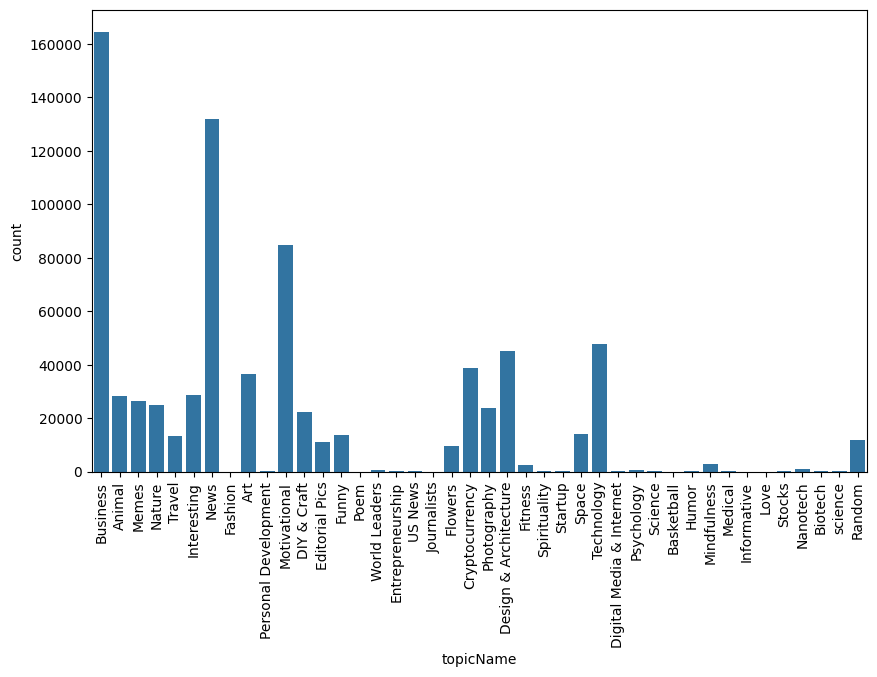

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'topicName', data = df)
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

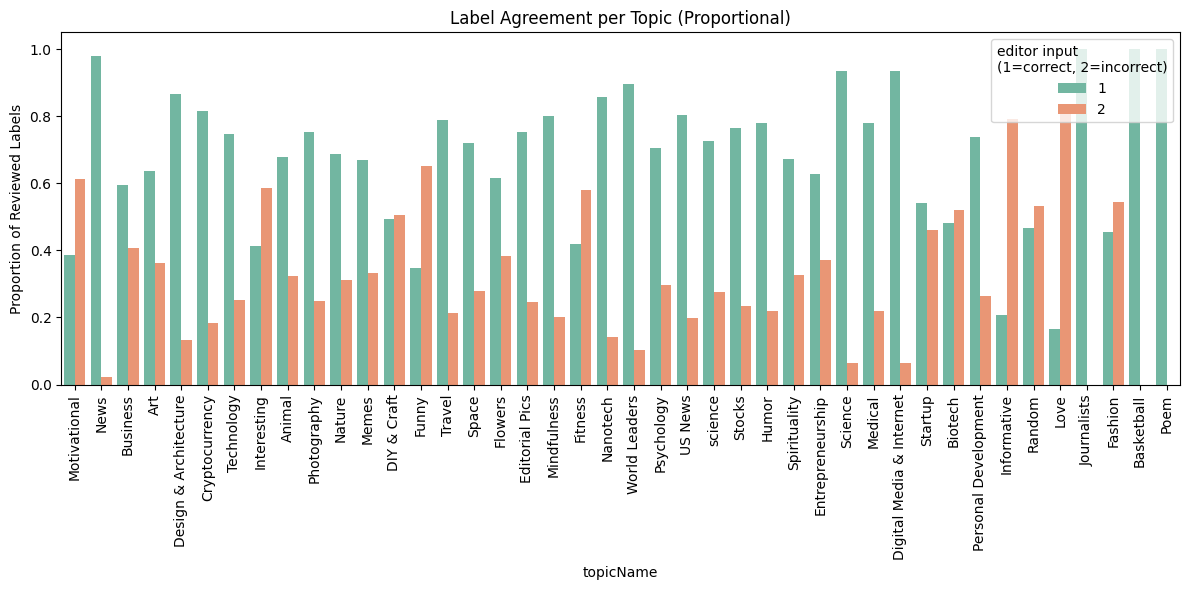

In [20]:
# Are there categories that the algorithim is more likely to get right/wrong when a tweet is reviewed?
# Create normalized counts
plot_data = (
    df[df['edInput'].isin([1, 2])]  #select only where reviewer agrees or disagrees
    .groupby(['topicName', 'edInput'])
    .size()
    .reset_index(name='count')
)

# Compute total reviewed tweets per category - see whether total number of tweets is skewed towards one category or another (and which category to choose for my first binary classifier)
topic_totals = (
    plot_data.groupby('topicName')['count']
    .sum()
    .reset_index(name='total_reviews')
)
# Merge total counts back plot_data
plot_data = plot_data.merge(topic_totals, on='topicName')
plot_data = plot_data.sort_values('total_reviews', ascending=False)

# Normalize within each topicName
plot_data['prop'] = plot_data.groupby('topicName')['count'].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='topicName', y='prop', hue='edInput', palette='Set2')
plt.xticks(rotation=90)
plt.ylabel("Proportion of Reviewed Labels")
plt.legend(title='editor input \n(1=correct, 2=incorrect)', loc='upper right')
plt.title("Label Agreement per Topic (Proportional)")
plt.tight_layout()
plt.show()

In [21]:
# Business was most common in the original df, check dataset inclusing only reviewed tweets has more motirvational and news tweets
topic_totals.sort_values('total_reviews', ascending=False).head(10)

,topicName,total_reviews
23,Motivational,38130
26,News,32478
4,Business,30024
1,Art,25396
7,Design & Architecture,24009
5,Cryptocurrency,21682
37,Technology,19617
17,Interesting,17065
0,Animal,16130
28,Photography,15147


Looks like there are systematic differences in how algorithim is performing, among the more common topics 'Motivational' is very bad, 'News' is very good and 'Business' somewhere in the middle. 

# Generate clean, well-labelled dataset for analysis of label distribution and pre-processing

In [22]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [23]:
# Select only tweets that have been reviewed and apporved by an editor
df_clean = df.copy()
df_clean = df_clean[df_clean['edInput'] == 1]

# drop columns not needed for analysis
df_clean = df_clean.drop(columns=['tweetID', 'crDate','photoUrl', 'rtUsID', 'usID', 'edInput', 'isEdNeed','videoUrl','editor','isApproved','usFlwrs'])
df_clean.shape #expect 215577

(215577, 7)

## Handle retweets

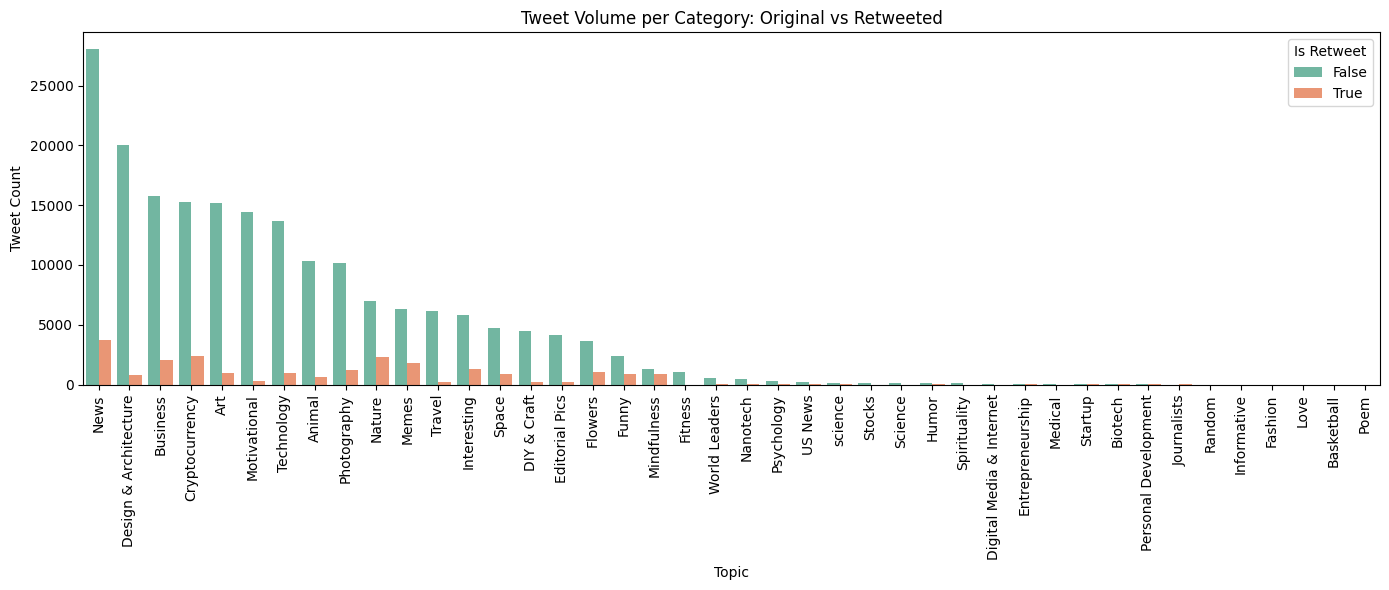

In [24]:
#Handle retweets - look at distribution of retweet vs original tweets by category
rt_counts = (
    df_clean.groupby(['topicName', 'isRT'])
    .size()
    .reset_index(name='count')
    .sort_values(ascending=False, by='count')   
)

plt.figure(figsize=(14, 6))
sns.barplot(data=rt_counts, x='topicName', y='count', hue='isRT', palette='Set2')
plt.xticks(rotation=90)
plt.title("Tweet Volume per Category: Original vs Retweeted")
plt.ylabel("Tweet Count")
plt.xlabel("Topic")
plt.legend(title="Is Retweet")
plt.tight_layout()
plt.show()

In [25]:
# Are retweets duplicates of tweets in the dataset?
retweets = df[df['isRT'] == True]
originals = df[df['isRT'] == False]

# Find retweet texts that also appear in originals
overlapping_texts = retweets['text'].isin(originals['text'])

# Count how many retweets are duplicates of originals
num_overlap = overlapping_texts.sum()
num_retweets = len(retweets)
print(f"{num_overlap} out of {num_retweets} retweets are exact duplicates of original tweets in original dataset")

3840 out of 134915 retweets are exact duplicates of original tweets in original dataset


Looks like only small fraction of retweets duplicates

In [26]:
# Are retweets duplicates of tweets in the dataset?
retweets_clean = df_clean[df_clean['isRT'] == True]
originals_clean = df_clean[df_clean['isRT'] == False]

# Find retweet texts that also appear in originals
overlapping_texts_clean = retweets_clean['text'].isin(originals_clean['text'])

# Count how many retweets are duplicates of originals
num_overlap_clean = overlapping_texts_clean.sum()
num_retweets_clean = len(retweets_clean)
print(f"{num_overlap_clean} out of {num_retweets_clean} retweets are exact duplicates of original tweets in cleaned/labelled dataset")

574 out of 23263 retweets are exact duplicates of original tweets in cleaned/labelled dataset


In [27]:
df_clean['isRT'].value_counts()

isRT
False    192314
True      23263
Name: count, dtype: int64

In [28]:
df_clean.shape

(215577, 7)

In [29]:
# Keep original tweets and non-duplicate retweets
df_clean = df_clean[~df_clean['isRT'] | ~overlapping_texts_clean]
df_clean.shape

(215003, 7)

In [30]:
df_clean.columns

Index(['engages', 'isRT', 'likes', 'retweets', 'text', 'topicName', 'usName'], dtype='object')

## Handle duplicates in original tweets

In [31]:
duplicate_originals_clean = originals_clean[originals_clean['text'].duplicated(keep=False)]
num_unique_duplicate_texts = duplicate_originals_clean['text'].nunique()
print(f"Number of unique duplicate texts in originals: {num_unique_duplicate_texts}")

Number of unique duplicate texts in originals: 6410


In [32]:
# deduplicate original tweets
df_clean = df_clean.drop_duplicates(subset=['text'], keep='first')
df_clean.shape

(204453, 7)

## Target label distribution analysis

Text(0.5, 1.0, 'Distribution of Topic Names in Cleaned Dataset')

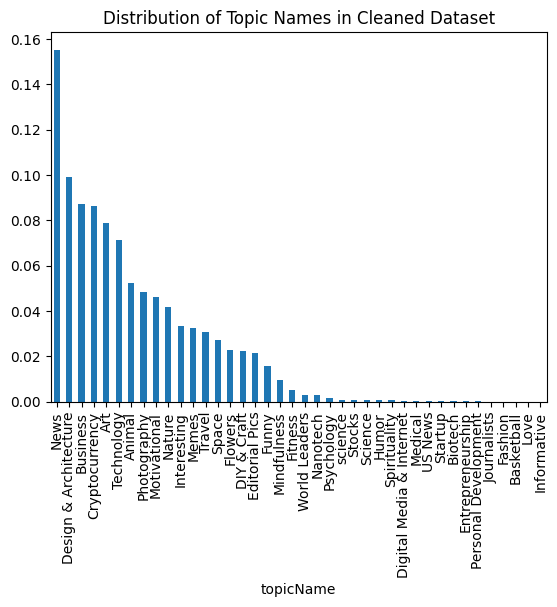

In [33]:
# Look at distribution of topic names in the cleaned dataset (where we're confident in the labels)
df_clean['topicName'].value_counts(normalize= True).plot(kind='bar') #show proportions instead of absolute counts
plt.title('Distribution of Topic Names in Cleaned Dataset')

All the topics will be imbalanced in a binary base model classifier, maybe start with news as this is the largest category (and also, potentially easier to classify given the figure above showing this was generally correctly-labelled)?

# Prepare target variable

I'm going to start with 'News' - this is the largest category in the cleaned dataset, and also the most correctly classified by the original algorithim.

In [34]:
df_clean['target'] = (df_clean['topicName']=='News').astype(int)

In [35]:
df_clean['target'].value_counts()

target
0    172708
1     31745
Name: count, dtype: int64

## Prepare structured features

In [36]:

df_clean['isRT'] = df_clean['isRT'].astype(int)
df_clean['likes_log'] = np.log1p(df_clean['likes']) # log transform likes, retweets and engages to reduce skewness (see EDA above)
df_clean['retweets_log'] = np.log1p(df_clean['retweets'])
df_clean['engages_log'] = np.log1p(df_clean['engages'])

structured_features = df_clean[['isRT', 'likes_log', 'retweets_log', 'engages_log']].values

# Text preprocessing

In [37]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = re.sub(r"http\S+", "", text)             # remove URLs
    text = re.sub(r"@\w+", "", text)                # remove mentions
    text = re.sub(r"#\w+", "", text)                # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)             # remove punctuation
    text = re.sub(r"\d+", "", text)                 # remove numbers
    return text.lower()

df_clean['text_clean'] = df_clean['text'].fillna('').apply(clean_text)
df_clean['text_clean'] = df_clean['text_clean'].apply(
    lambda x: " ".join([word for word in x.split() if word not in ENGLISH_STOP_WORDS])
)

In [38]:
df_clean[['text_clean','text']].sample(5)

,text_clean,text
285356,nature just wow,Nature is just... WOW\n@atlasobscura https://t...
661046,photo day canary spring,Photo of the Day: Canary Spring https://t.co/V...
473703,tesla new plan revive foundering solar business,Tesla has a new plan to revive its foundering ...
456577,breaking people reportedly shot charlotte nort...,BREAKING: Three people have reportedly been sh...
781548,congrats dan graduating dog school dan looking...,Congrats to Dan for Graduating Dog School! 🎓\n...


# Models

## Logistic regression

In [39]:
# TF-IDF Vectorization - first try a model using only the text data as feature
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_text = vectorizer.fit_transform(df_clean['text_clean'])
y = df_clean['target']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, stratify=y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     34542
           1       0.55      0.81      0.66      6349

    accuracy                           0.87     40891
   macro avg       0.76      0.85      0.79     40891
weighted avg       0.90      0.87      0.88     40891



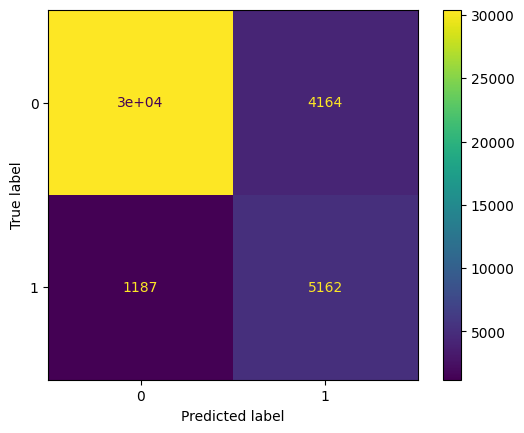

In [41]:
# First try a model using only text feature
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')  # handle class imbalance with class weigts 
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.5535063263993137
Recall:    0.813041423846275
F1 Score:  0.6586283891547049


Add some structured features

In [43]:
from scipy.sparse import hstack

X_combined = hstack([X_text, structured_features])

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     34542
           1       0.57      0.84      0.68      6349

    accuracy                           0.88     40891
   macro avg       0.77      0.86      0.80     40891
weighted avg       0.91      0.88      0.89     40891



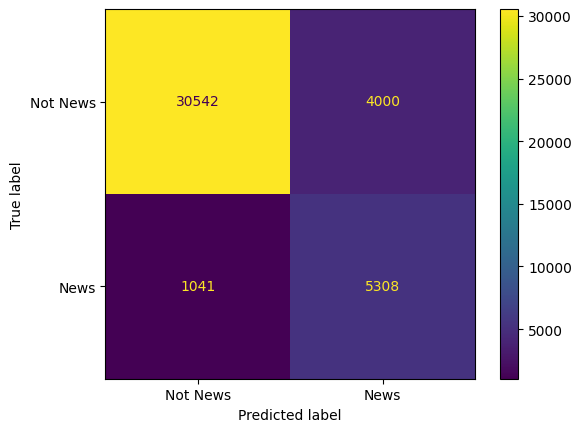

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, stratify=y, test_size=0.2, random_state=42)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [45]:

print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.5702621400945423
Recall:    0.8360371712080643
F1 Score:  0.6780353835345213


Adding features improves model performance a little. What about if I add source of tweet data? >20,000 different tweet sources, try target encoding instead (take mean target per user)

In [46]:
from sklearn.preprocessing import StandardScaler
# Split data first (before any transformations - this is critical to prevent data linkage (where calculate mean of usName target including test set data)
y = df_clean['target']
train_idx, test_idx = train_test_split(
    np.arange(len(df_clean)), 
    stratify=y, 
    test_size=0.2, 
    random_state=42
)

train_df = df_clean.iloc[train_idx].copy()
test_df = df_clean.iloc[test_idx].copy()

# Fit text vectorizer only on training data
vectorizer = TfidfVectorizer()
X_text_train = vectorizer.fit_transform(train_df['text_clean'])
X_text_test = vectorizer.transform(test_df['text_clean'])

# Compute username encoding (target mean) on training data only
user_target_means = train_df.groupby('usName')['target'].mean()
global_mean = train_df['target'].mean()

# Apply encoding to both sets
train_df['usName_enc'] = train_df['usName'].map(user_target_means)
test_df['usName_enc'] = test_df['usName'].map(user_target_means)

# Handle unseen usernames in test set - fixed to avoid chained assignment warnings
train_df['usName_enc'] = train_df['usName_enc'].fillna(global_mean)
test_df['usName_enc'] = test_df['usName_enc'].fillna(global_mean)

# select structured features
structured_features = ['isRT', 'likes_log', 'retweets_log', 'engages_log', 'usName_enc']

# Scale numerical features
scaler = StandardScaler()
structured_train = scaler.fit_transform(train_df[structured_features])
structured_test = scaler.transform(test_df[structured_features])

# Combine text and structured features
X_train = hstack([X_text_train, structured_train])
X_test = hstack([X_text_test, structured_test])

y_train = train_df['target'].values
y_test = test_df['target'].values

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34542
           1       0.99      0.99      0.99      6349

    accuracy                           1.00     40891
   macro avg       0.99      0.99      0.99     40891
weighted avg       1.00      1.00      1.00     40891



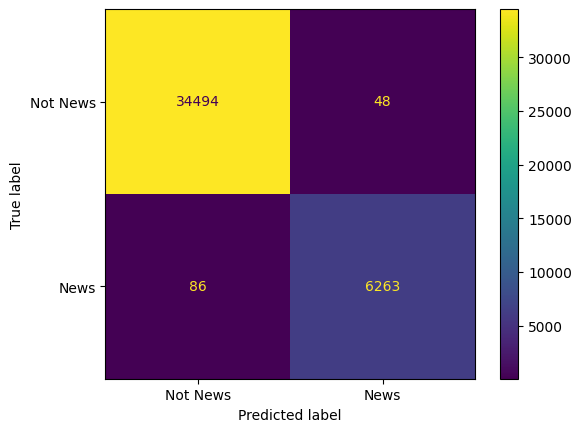

In [47]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [48]:

print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9923942322928221
Recall:    0.9864545597731926
F1 Score:  0.9894154818325435


Adding source makes the model work almost perfectly: model is probably just memorizing the source instead of learning from the text. Will we always have the usName? If we want the model to use the text, need to optimise this rather than rely on the source.

              precision    recall  f1-score   support

    Not News      0.998     0.998     0.998     34542
        News      0.991     0.986     0.989      6349

    accuracy                          0.996     40891
   macro avg      0.994     0.992     0.993     40891
weighted avg      0.996     0.996     0.996     40891



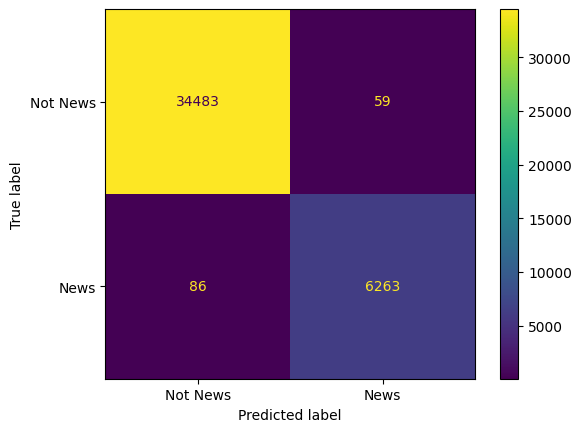

In [49]:
# try a model using only the structured features
X_train_struct = structured_train  
X_test_struct = structured_test    

y_train = train_df['target'].values
y_test = test_df['target'].values

model_struct = LogisticRegression(max_iter=1000, class_weight='balanced')
model_struct.fit(X_train_struct, y_train)

# Predict
y_pred_struct = model_struct.predict(X_test_struct)

print(classification_report(y_test, y_pred_struct, target_names=["Not News", "News"], digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_struct, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [50]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9923942322928221
Recall:    0.9864545597731926
F1 Score:  0.9894154818325435


Performance essentially identical to including the text information, so it definitely looks like model just memorising source, which seems to work very well for News category!

# Different classification models evaluation and comparison

## Random forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34542
           1       0.99      0.99      0.99      6349

    accuracy                           1.00     40891
   macro avg       0.99      0.99      0.99     40891
weighted avg       1.00      1.00      1.00     40891



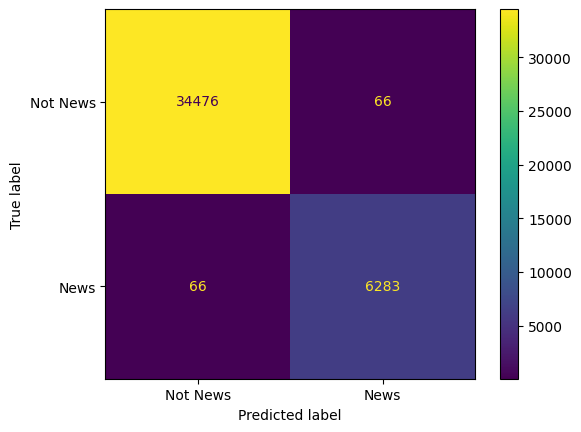

In [51]:
# Try a random forest classifier on combined features dataset
from sklearn.ensemble import RandomForestClassifier

# Combine text and structured features to generate train and test datasets with text and structured features
X_train = hstack([X_text_train, structured_train])
X_test = hstack([X_text_test, structured_test])

y_train = train_df['target'].values
y_test = test_df['target'].values

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [52]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9896046621515199
Recall:    0.9896046621515199
F1 Score:  0.9896046621515199


## Linear support vector machine

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34542
           1       0.99      0.99      0.99      6349

    accuracy                           1.00     40891
   macro avg       1.00      0.99      0.99     40891
weighted avg       1.00      1.00      1.00     40891



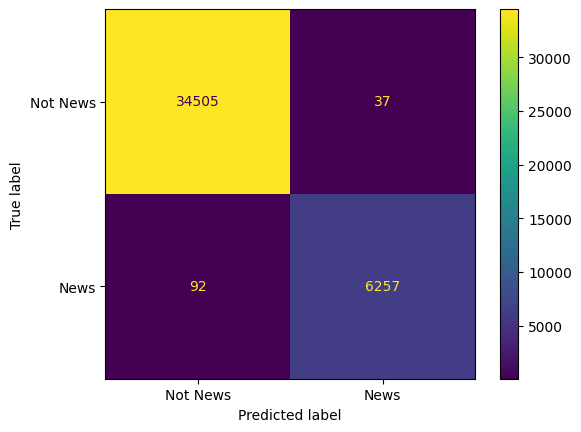

In [53]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [54]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9941213854464569
Recall:    0.9855095290596945
F1 Score:  0.9897967254607293


## XGBoost

C:\Users\balin\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:10:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34542
           1       0.99      0.99      0.99      6349

    accuracy                           1.00     40891
   macro avg       1.00      0.99      0.99     40891
weighted avg       1.00      1.00      1.00     40891



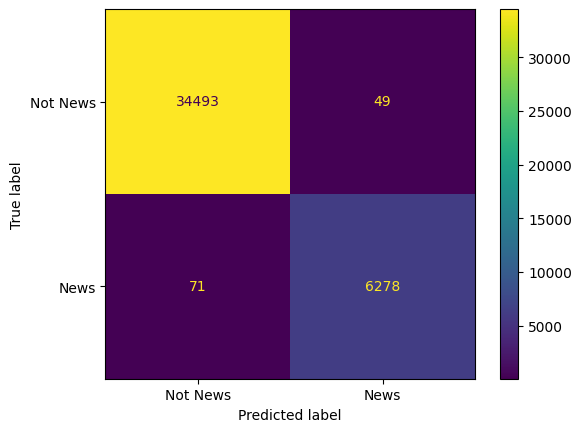

In [55]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [56]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9922554133080449
Recall:    0.9888171365569381
F1 Score:  0.9905332912590723


## Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34542
           1       0.98      0.99      0.98      6349

    accuracy                           0.99     40891
   macro avg       0.99      0.99      0.99     40891
weighted avg       0.99      0.99      0.99     40891



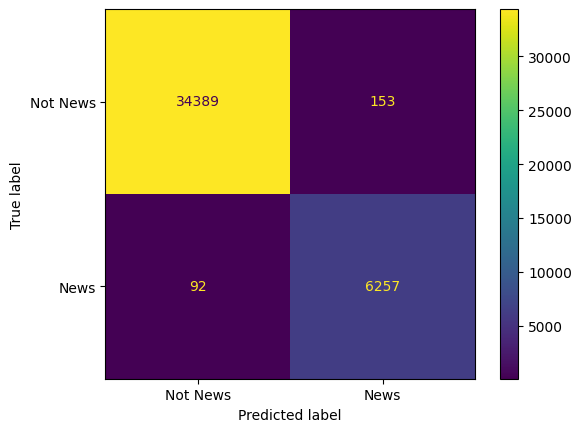

In [57]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB
X_train.data = X_train.data.clip(min=0)
X_test.data = X_test.data.clip(min=0)
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [58]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9761310452418097
Recall:    0.9855095290596945
F1 Score:  0.9807978681714868


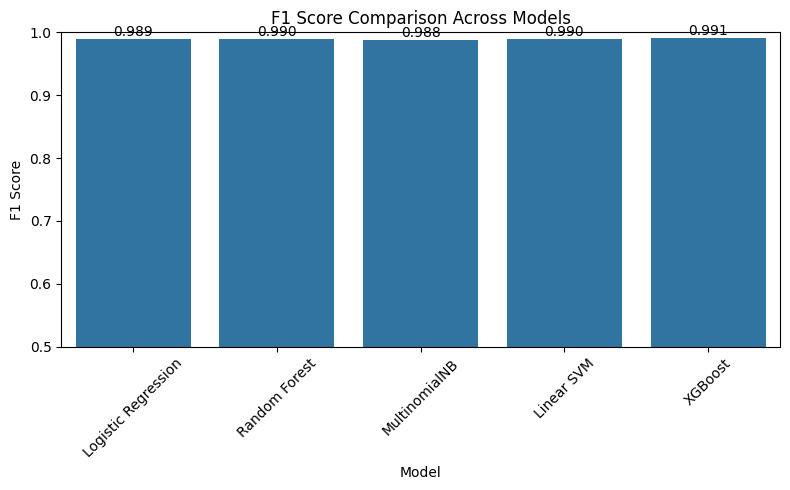

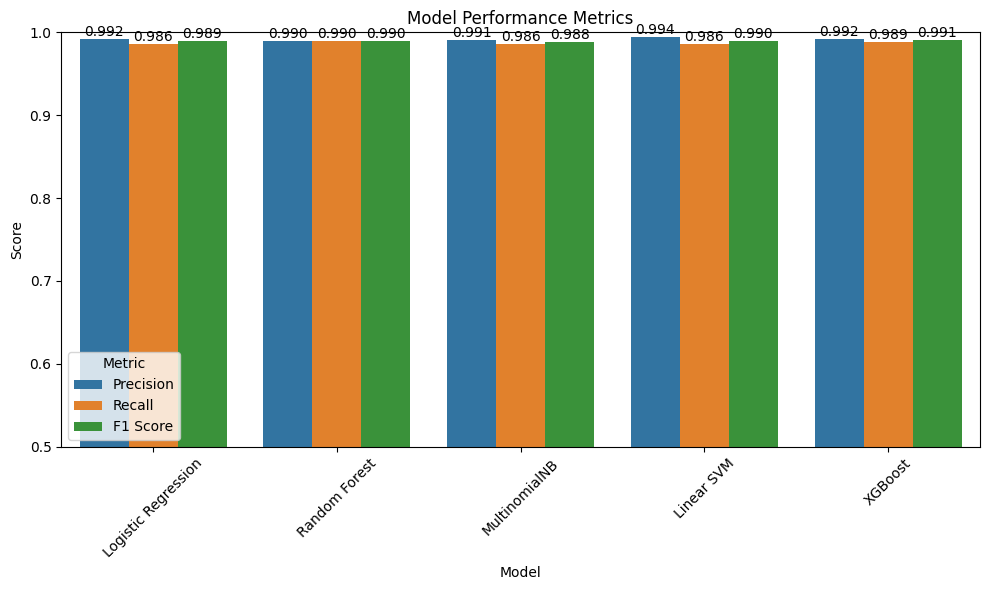

In [59]:
models = [
    ('Logistic Regression', logistic_model),
    ('Random Forest', rf_model),
    ('MultinomialNB', nb_model),
    ('Linear SVM', svm_model),
    ('XGBoost', xgb_model),
]

X_train = hstack([X_text_train, structured_train])
X_test = hstack([X_text_test, structured_test])
y_train = train_df['target'].values
y_test = test_df['target'].values

# Evaluate and store metrics
results = []
for name, model in models:
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    })

# Create DataFrame
df_results = pd.DataFrame(results)

# Melt for easy plotting
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot F1 Score
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_results, x='Model', y='F1 Score')
plt.title("F1 Score Comparison Across Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
# Add text labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.tight_layout()
plt.show()

# plot all metrics
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Performance Metrics")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)

# Add text labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.tight_layout()
plt.show()

XGBoost my best performing model on text + structured data (F1 = 0.9905), quite fast too. Take this model forward for hypertuning

## XGBosst hypertuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [61]:
# Define the model
#xgb_model = xgb.XGBClassifier(
 #   tree_method='hist',
  #  use_label_encoder=False,
   # eval_metric='logloss',
    #verbosity=0
#)

# F1 scorer (binary classification)
#f1 = make_scorer(f1_score, average='binary')

# Parameter grid to explore
#param_grid = {
 #   'n_estimators': [50, 100, 200],         # number of boosting rounds
  #  'max_depth': [3, 5, 7],                 # maximum depth of trees
   # 'learning_rate': [0.05, 0.1, 0.2],      # step size shrinkage        
    #'subsample': [0.8, 1.0],                # fraction of rows per tree
    #'colsample_bytree': [0.8, 1.0],         # fraction of columns per tree
#}

# GridSearch with 3-fold CV
#grid_search = GridSearchCV(
#    estimator=xgb_model,
#    param_grid=param_grid,
#    scoring=f1,
#    cv=3,
#    verbose=1,
#    n_jobs=-1
#)

# Run the search (timing ~minutes depending on grid size and machine)
#grid_search.fit(X_train, y_train)

# Best model and parameters
#print("Best F1 Score: ", grid_search.best_score_)
#print("Best Parameters: ", grid_search.best_params_)

# Predict and evaluate
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_test)
#print(classification_report(y_test, y_pred, digits=2))

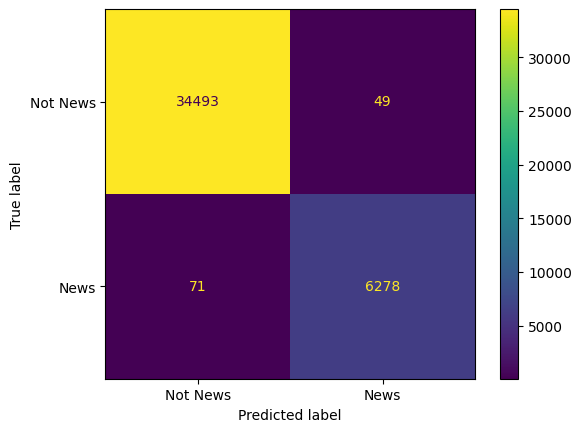

In [62]:
# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not News", "News"])
disp.plot()

In [63]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision: 0.9922554133080449
Recall:    0.9888171365569381
F1 Score:  0.9905332912590723


# Train and optimise a multi-category classifier

In [64]:
df_clean.head()

,engages,isRT,likes,retweets,text,topicName,usName,target,likes_log,retweets_log,engages_log,text_clean
721,5137,0,4180,957,Which one would you choose? 👀 https://t.co/U0s...,Fashion,Gentleman’s style,0,8.338306,6.864848,8.544419,choose
1374,52650,1,36349,16301,How it’s made. 😊 https://t.co/3XjOw4gIkg,Interesting,Satisfying Slime,0,10.500949,9.699043,10.871441,
2206,1714,0,1261,453,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡 https://t.co/WdavWJcSyw,Art,𝐴𝑟𝑡.,0,7.140453,6.118097,7.447168,𝐶𝑙𝑎𝑢𝑑𝑒 𝑀𝑜𝑛𝑒𝑡
2263,62062,0,49073,12989,Baby Alpacas are so under appreciated. https:/...,Animal,Nature is Amazing ☘️,0,10.801085,9.471935,11.035905,baby alpacas appreciated
2660,78403,1,58396,20007,For some people the idea of compassion entails...,Personal Development,Dalai Lama,0,10.975020,9.903887,11.269630,people idea compassion entails complete disreg...


In [65]:
# Keep only classes with at least 100 samples
min_samples = 10000
valid_classes = df_clean['target'].value_counts()
valid_classes = valid_classes[valid_classes >= min_samples].index

df_clean = df_clean[df_clean['target'].isin(valid_classes)].copy()



In [66]:
# Map topics to integers
topic_mapping = {name: i for i, name in enumerate(df_clean['topicName'].unique())}
df_clean['topicID'] = df_clean['topicName'].map(topic_mapping)
df_clean.sample(10)

df_clean['target'] = df_clean['topicID']

In [67]:
df_clean['target'].nunique()

40

In [68]:
# Stratified split
y = df_clean['target']
train_idx, test_idx = train_test_split(
    np.arange(len(df_clean)), 
    stratify=y, 
    test_size=0.2, 
    random_state=42
)

train_df = df_clean.iloc[train_idx].copy()
test_df = df_clean.iloc[test_idx].copy()

# Fit text vectorizer only on training data
vectorizer = TfidfVectorizer()
X_text_train = vectorizer.fit_transform(train_df['text_clean'])
X_text_test = vectorizer.transform(test_df['text_clean'])

# Compute class-conditional probabilities for usName
usName_class_probs = (
    train_df.groupby('usName')['target']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Encode usName for train/test sets
train_usName_enc = train_df['usName'].map(usName_class_probs.to_dict('index')).apply(pd.Series)
test_usName_enc = test_df['usName'].map(usName_class_probs.to_dict('index')).apply(pd.Series)

# Fill unseen usNames in test with class priors
class_priors = train_df['target'].value_counts(normalize=True).sort_index()
test_usName_enc = test_usName_enc.fillna(class_priors)

# Ensure class column order is consistent
class_order = sorted(train_df['target'].unique())
train_usName_enc = train_usName_enc[class_order]
test_usName_enc = test_usName_enc[class_order]

# Scale structured features (excluding usName)
structured_features = ['isRT', 'likes_log', 'retweets_log', 'engages_log']
scaler = StandardScaler()
structured_train = scaler.fit_transform(train_df[structured_features])
structured_test = scaler.transform(test_df[structured_features])

# Combine text + structured + usName encodings
X_train = hstack([X_text_train, structured_train, train_usName_enc.values])
X_test = hstack([X_text_test, structured_test, test_usName_enc.values])

# Ensure y_train and y_test are set correctly
y_train = train_df['target'].values
y_test = test_df['target'].values

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

C:\Users\balin\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [09:23:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3229
           1       1.00      0.98      0.99      2145
           2       1.00      0.99      0.99      6349
           3       0.99      0.99      0.99      3560
           4       1.00      0.95      0.97      3535
           5       0.91      1.00      0.95      4048
           6       1.00      0.98      0.99      2920

    accuracy                           0.98     25786
   macro avg       0.98      0.98      0.98     25786
weighted avg       0.98      0.98      0.98     25786



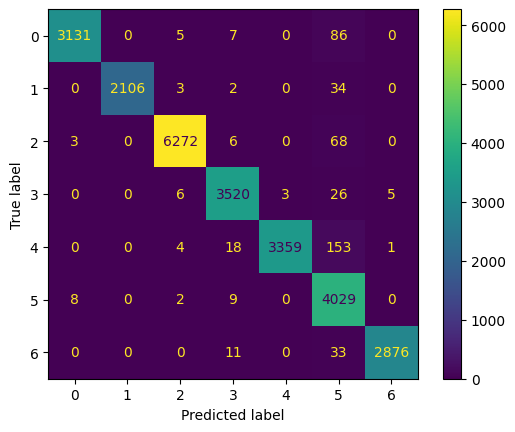

In [ ]:
xgb_model = xgb.XGBClassifier(tree_method='hist', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
df_clean[['target','topicName']].drop_duplicates().sort_values('target')

,target,topicName
2206,0,Art
2263,1,Animal
7923,2,News
18004,3,Business
37647,4,Cryptocurrency
43342,5,Design & Architecture
60071,6,Technology


## Finetune my XGBosst multiclass classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the model
xgb_model = xgb.XGBClassifier(
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0
)

# F1 scorer (multi-class classification)
f1 = make_scorer(f1_score, average='weighted')

# Parameter grid to explore
param_grid = {
    'n_estimators': [50, 100, 200],         # number of boosting rounds
    'max_depth': [3, 5, 7],                 # maximum depth of trees
    'learning_rate': [0.05, 0.1, 0.2],      # step size shrinkage        
    'subsample': [0.8, 1.0],                # fraction of rows per tree
    'colsample_bytree': [0.8, 1.0],         # fraction of columns per tree
}

# GridSearch with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f1,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best F1 Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

# Predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=2))

# Confusion Matrix with class labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NameError: name 'xgb' is not defined